# **Kaggle Competition for House Prices**

dataset : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data




**Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading dataset**

In [9]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [10]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Handling Missing Values**

In [11]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

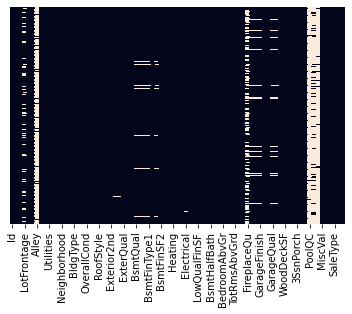

In [12]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [13]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**Removing columns with large number of missing values**

---



In [16]:
train_df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
test_df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)


**Filling numerical columns with mean and categorical ones with mode**

In [17]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
train_df['BsmtQual'] = train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])
train_df['BsmtCond'] = train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])
train_df['GarageType'] = train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual'] = train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['GarageCond'] = train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])
train_df['GarageCond'] = train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])




In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [19]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['MasVnrType'] = test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean())
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])


test_df['GarageType'] = test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [21]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


**Handling Categorical Features**

In [22]:
categories =train_df.select_dtypes(include=['object']).columns.tolist()

In [23]:
categories

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [24]:
def cat_to_num(columns,df):
    df_final=df
    i=0
    for column in columns:
        
        
        df1=pd.get_dummies(df[column],drop_first=True)
        
        df.drop([column],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [25]:
train= cat_to_num(categories,train_df)

In [26]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [27]:
test= cat_to_num(categories,test_df)

In [28]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
train.shape

(1460, 234)

In [30]:
test.shape

(1459, 217)

In [31]:
train =train.loc[:,~train.columns.duplicated()]

In [32]:
train.shape

(1460, 178)

In [33]:
test=test.loc[:,~test.columns.duplicated()]
test.shape

(1459, 167)

In [50]:
train_columns= train.columns
test_columns= test.columns

In [51]:
for c1 in train_columns:
  if c1 in test_columns:
    continue
  else:
    print(c1)

SalePrice
NoSeWa
2.5Fin
CompShg
Membran
Metal
Roll
Other
GasA
OthW
Mix


In [52]:
columns2= ['NoSeWa','2.5Fin','CompShg','Membran','Metal','Roll','Other','GasA','OthW','Mix']

In [53]:
for field in columns2:
  test[field]= 0

In [54]:
test.shape

(1459, 177)

**Model Fitting**

In [38]:
X_train=train.drop(['SalePrice'],axis=1)
Y_train=train['SalePrice']

*Importing Linear Regression from Scikit learn*

In [35]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [39]:
model.fit(X_train,Y_train)

LinearRegression()

Prediction On training data

In [42]:
from sklearn import metrics

In [40]:
training_pred = model.predict(X_train)

In [41]:
training_pred

array([210235.98579054, 200883.35537495, 206423.3006732 , ...,
       280212.36613728, 146161.38912389, 152136.35318121])

**R squared error**

In [44]:
score_1 = metrics.r2_score(Y_train, training_pred)
score_1

0.9102619546201016

**Mean Absolute Error**

In [45]:
score_2 = metrics.mean_absolute_error(Y_train,training_pred)
score_2

15070.630203940336

**Visualizing predicted price vs actual price**

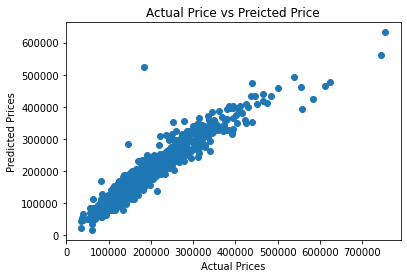

In [46]:
plt.scatter(Y_train, training_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

**prediction on Test Data**

In [55]:
test_data_prediction = model.predict(test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [56]:
test_data_prediction

array([-556147.14974185, -517513.25411077, -557758.25321769, ...,
       -503062.12221494,  170803.5725216 ,  284132.22908048])